# 3D Spatial Configuration demo

This notebook provides a simple demo for 3D Spatial Configuration generatino proposed in our paper.

## Preparation

Import necessary modules and functions.

In [1]:
import os
import os.path as osp
import numpy as np
import pickle
import trimesh
import torch
from generate_utils import get_order_obj, get_joints, get_param, point_align_vis

class Arguments():
    def __init__(self, gender, smplx_path):
        self.gender     = gender
        self.smplx_path = smplx_path

## Arguments

Specify the arguments for generation.

In [2]:
args     = Arguments(gender='male', smplx_path='/disk1/liyonglu/smplify-x/models/smplx/')
obj_name = 'keyboard'
result   = pickle.load(open('demo/result.pkl', 'rb'))
hbox     = pickle.load(open('demo/hbox.pkl', 'rb'))
obox     = pickle.load(open('demo/obox.pkl', 'rb'))
mesh       = 'demo/human.obj'
img        = 'demo/sample.jpg'

## Generation

Generate and save the 3D Spatial Configuration. MeshLab is recommended for visualizing the generated `demo/config.obj`.

In [6]:
list_hoi, order_obj_list, obj_para_dict = get_order_obj()
htri       = trimesh.load(mesh)
vertice    = np.array(htri.vertices,dtype=np.float32)
joints     = get_joints(args, torch.FloatTensor(torch.from_numpy(vertice.reshape(1,-1,3))))
shoulder_len = np.linalg.norm(joints[16] - joints[17])
radius    = obj_para_dict[obj_name]['ratio'] * shoulder_len
gamma_min = obj_para_dict[obj_name]['gamma_min']
gamma_max = obj_para_dict[obj_name]['gamma_max']
otri, _   = get_param(result, hbox, obox, htri, img, radius, gamma_min, gamma_max)
config    = htri + otri
_ = config.export('demo/config.obj')

## Reprojection visualization

We also provide a simple reprojection visualization for both human and object.

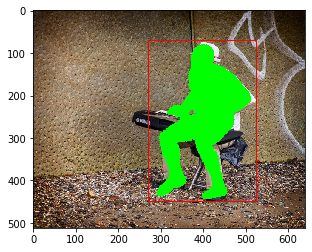

In [4]:
point_align_vis(result, hbox, 'demo/human.obj', img)

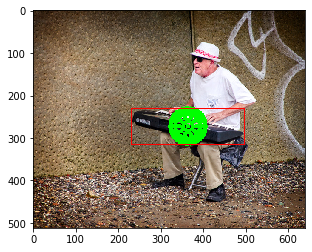

In [5]:
point_align_vis(result, obox, 'demo/object.obj', img)